Make sure to set the `ERA5LOWRES` environment variable to make the ERA5 low-resolution archive foundable on your system.
Modify the following cell as follows:

- for NCI

```
%env ERA5LOWRES=/g/data/wb00/NCI-Weatherbench/5.625deg
```

- for NIWA

```
%env ERA5LOWRES=/nesi/nobackup/niwa00004/riom/weatherbench/5.625deg
```

In [1]:
%env ERA5LOWRES=/nesi/nobackup/niwa00004/riom/weatherbench/5.625deg

env: ERA5LOWRES=/nesi/nobackup/niwa00004/riom/weatherbench/5.625deg


In [2]:
# Here we import the same models as from the previous example
import edit.data
import edit.tutorial

/scale_wlg_persistent/filesets/project/niwa99999/riom/edit_evaluation/EDIT/packages/tutorial/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/scale_wlg_persistent/filesets/project/niwa99999/riom/edit_evaluation/EDIT/packages/data/src/edit/data/__init__.py:142: FutureWarning: `edit` is under heavy development and may not continue to be supported.
  __python_warnings.warn(


In [3]:
# Now we import the pipeline model which is new in this example
import edit.pipeline

In [4]:
data_preparation = edit.pipeline.Pipeline(
    (
        edit.data.archive.era5lowres(['u', 'v']), 
        edit.data.archive.era5lowres(['geopotential', 'vorticity']), 
    ),
    edit.pipeline.operations.xarray.Merge(),
    edit.pipeline.operations.xarray.Sort(['msl', '10u', '10v', '2t', 'geopotential', 'vorticity']),
    edit.pipeline.operations.Transforms(
        apply = edit.data.transforms.coordinates.standard_longitude(type = '0-360') + edit.data.transforms.coordinates.ReIndex(level = 'reversed')
        ),
    # edit.pipeline.operations.xarray.reshape.CoordinateFlatten('level'),
    # edit.pipeline.operations.xarray.conversion.ToNumpy(),
    # edit.pipeline.operations.numpy.reshape.Squish(1),
)


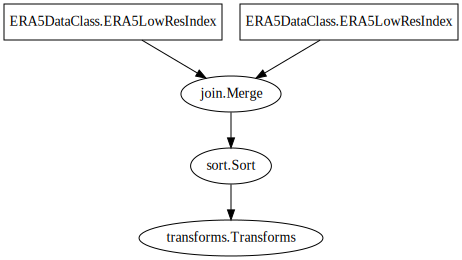

In [5]:
data_preparation

In [6]:
sample = data_preparation['1984-01-01'] 
sample

<xarray.Dataset> Size: 10MB
Dimensions:    (latitude: 32, longitude: 64, level: 13, time: 24)
Coordinates:
  * latitude   (latitude) float64 256B -87.19 -81.56 -75.94 ... 81.56 87.19
  * longitude  (longitude) float64 512B 0.0 5.625 11.25 ... 343.1 348.8 354.4
  * level      (level) int32 52B 1000 925 850 700 600 500 ... 250 200 150 100 50
  * time       (time) datetime64[ns] 192B 1984-01-01 ... 1984-01-01T23:00:00
Data variables:
    u          (time, level, latitude, longitude) float32 3MB dask.array<chunksize=(24, 6, 19, 39), meta=np.ndarray>
    v          (time, level, latitude, longitude) float32 3MB dask.array<chunksize=(24, 6, 19, 39), meta=np.ndarray>
    vo         (time, level, latitude, longitude) float32 3MB dask.array<chunksize=(24, 6, 19, 39), meta=np.ndarray>
    z          (time, level, latitude, longitude) float32 3MB dask.array<chunksize=(24, 6, 19, 39), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [7]:
sample.vo

<xarray.DataArray 'vo' (time: 24, level: 13, latitude: 32, longitude: 64)> Size: 3MB
dask.array<getitem, shape=(24, 13, 32, 64), dtype=float32, chunksize=(24, 7, 19, 39), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 256B -87.19 -81.56 -75.94 ... 81.56 87.19
  * longitude  (longitude) float64 512B 0.0 5.625 11.25 ... 343.1 348.8 354.4
  * level      (level) int32 52B 1000 925 850 700 600 500 ... 250 200 150 100 50
  * time       (time) datetime64[ns] 192B 1984-01-01 ... 1984-01-01T23:00:00
Attributes:
    units:          s**-1
    long_name:      Vorticity (relative)
    standard_name:  atmosphere_relative_vorticity